# Hypothesis Generation

- store size
- store location 
- product importance
- product price

# Loading Packages and Data

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

#Seaborn visualization set up
#%matplotlib inline
sns.set_style('darkgrid')

In [147]:
dftst=pd.read_csv(r"D:\technolabs\project1\Test.csv")

In [148]:
dftrain=pd.read_csv(r"D:\technolabs\project1\Train.csv")

# Exploratory Data Analysis


In [149]:
dftst

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [150]:
dftrain

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [151]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [152]:
dftrain.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [153]:
dfnum = dftrain
df=dftrain

In [154]:
dftrain

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


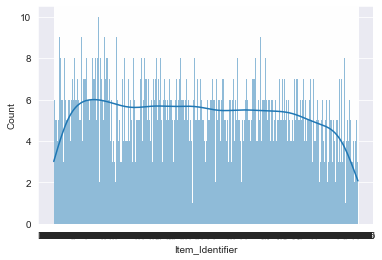

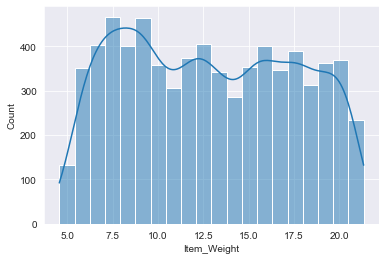

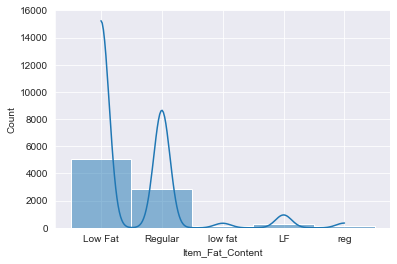

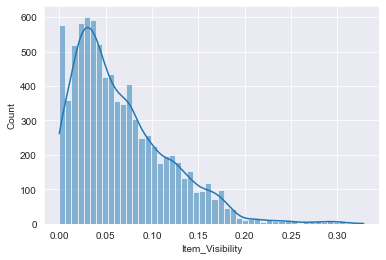

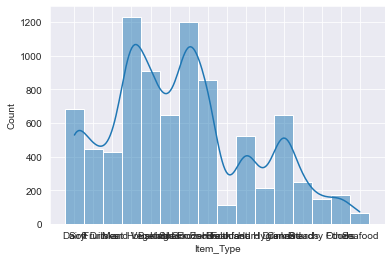

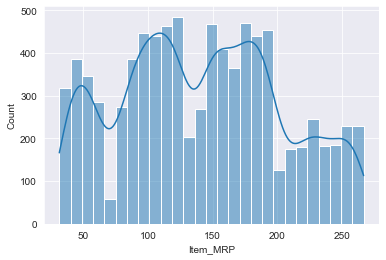

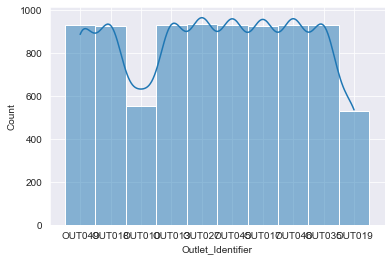

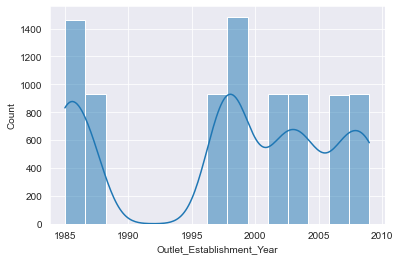

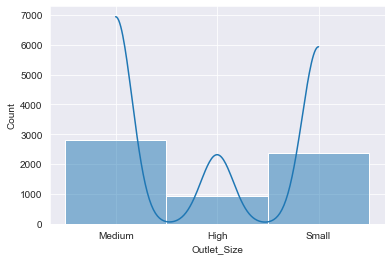

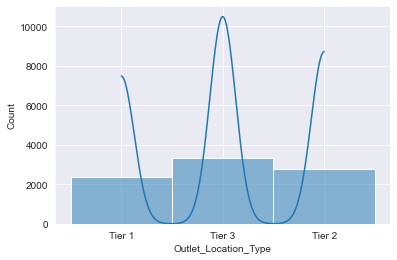

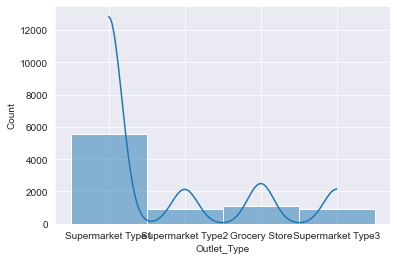

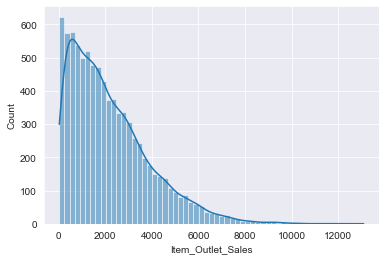

In [155]:
for col in dftrain: 
    sns.histplot(x = dftrain[col], kde=True)
    plt.show()

<AxesSubplot:>

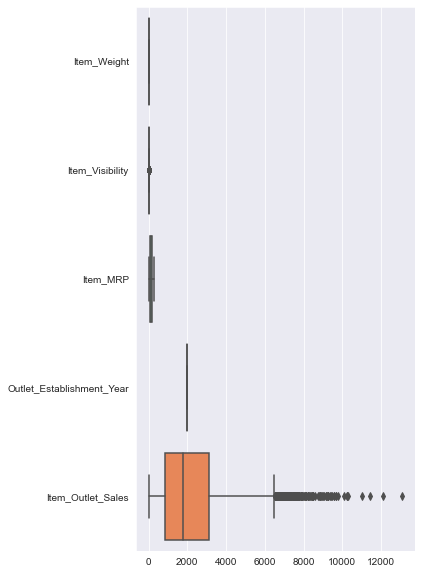

In [156]:
plt.figure(figsize= (5,10))
sns.boxplot(data=dftrain,palette='rainbow',orient='h')  # trying to see outliers #a huge gap betwen price values and other features values is noticed 

In [157]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dftrain[["Item_Outlet_Sales"]] = scaler.fit_transform(dftrain[["Item_Outlet_Sales"]])
dftrain[["Item_MRP"]] = scaler.fit_transform(dftrain[["Item_MRP"]])
dftrain[["Outlet_Establishment_Year"]] = scaler.fit_transform(dftrain[["Outlet_Establishment_Year"]])
dftrain[["Item_Weight"]] = scaler.fit_transform(dftrain[["Item_Weight"]])


In [158]:
dftrain.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.494352,0.066132,0.465635,0.534661,0.164551
std,0.276479,0.051598,0.264327,0.348823,0.130729
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.251191,0.026989,0.265437,0.083333,0.061359
50%,0.479012,0.053931,0.474209,0.583333,0.134908
75%,0.732063,0.094585,0.655156,0.791667,0.235030
max,1.000000,0.328391,1.000000,1.000000,1.000000


<AxesSubplot:>

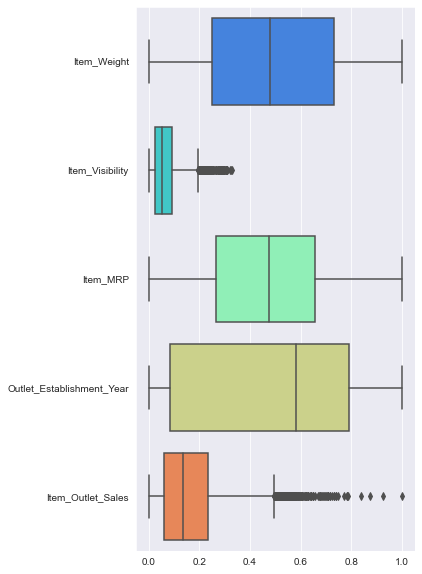

In [159]:
plt.figure(figsize= (5,10))
sns.boxplot(data=dftrain,palette='rainbow',orient='h')  # trying to see outliers #a huge gap betwen price values and other features values is noticed 

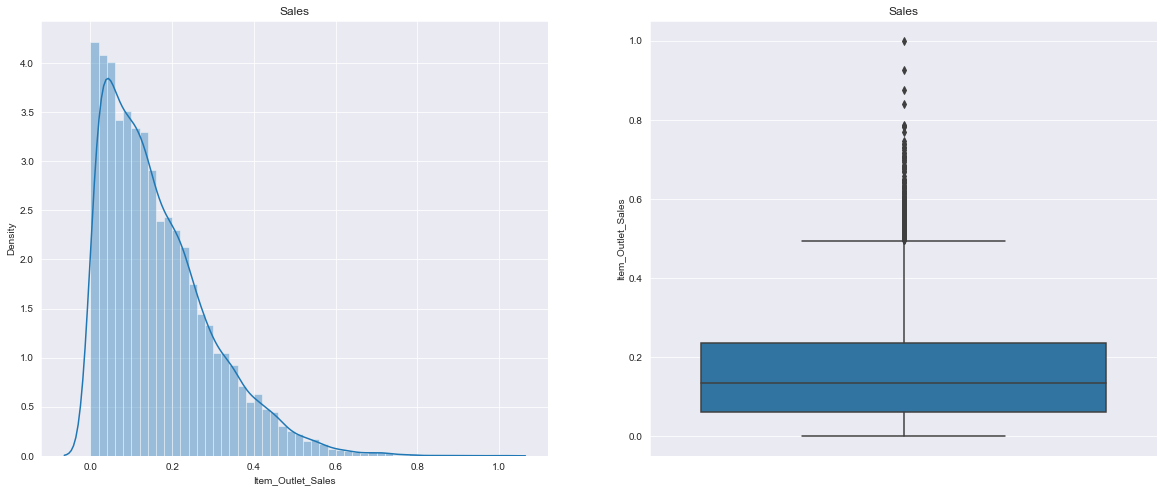

In [160]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Sales')
sns.distplot(dftrain.Item_Outlet_Sales)

plt.subplot(1,2,2)
plt.title('Sales')
sns.boxplot(y=dftrain.Item_Outlet_Sales)

plt.show()

In [161]:
# Calculate the percentage of null values in each column
null_percent = (dftrain.isnull().sum() / len(dftrain)) * 100

# Create a DataFrame to store the null percentage information
null_df = pd.DataFrame({'Column': null_percent.index, 'Null Percentage': null_percent.values})

# Display the null percentage for each column
print(null_df)


                       Column  Null Percentage
0             Item_Identifier         0.000000
1                 Item_Weight        17.165317
2            Item_Fat_Content         0.000000
3             Item_Visibility         0.000000
4                   Item_Type         0.000000
5                    Item_MRP         0.000000
6           Outlet_Identifier         0.000000
7   Outlet_Establishment_Year         0.000000
8                 Outlet_Size        28.276428
9        Outlet_Location_Type         0.000000
10                Outlet_Type         0.000000
11          Item_Outlet_Sales         0.000000


In [162]:
dftrain['Item_Weight'] = dftrain['Item_Weight'].fillna(dftrain['Item_Weight'].mean())
dftrain['Outlet_Size'] = dftrain['Outlet_Size'].fillna(dftrain['Outlet_Size'].mode().iloc[0])

In [163]:
# Calculate the percentage of null values in each column
null_percent = (dftrain.isnull().sum() / len(dftrain)) * 100

# Create a DataFrame to store the null percentage information
null_df = pd.DataFrame({'Column': null_percent.index, 'Null Percentage': null_percent.values})

# Display the null percentage for each column
print(null_df)

                       Column  Null Percentage
0             Item_Identifier              0.0
1                 Item_Weight              0.0
2            Item_Fat_Content              0.0
3             Item_Visibility              0.0
4                   Item_Type              0.0
5                    Item_MRP              0.0
6           Outlet_Identifier              0.0
7   Outlet_Establishment_Year              0.0
8                 Outlet_Size              0.0
9        Outlet_Location_Type              0.0
10                Outlet_Type              0.0
11          Item_Outlet_Sales              0.0


In [164]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Identify categorical columns
categorical_columns = dftrain.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
label_encoder = LabelEncoder()
label_encoded_df = dftrain.copy()
for column in categorical_columns:
    label_encoded_df[column] = label_encoder.fit_transform(dftrain[column])

# Apply One-Hot Encoding to categorical columns
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
onehot_encoded = onehot_encoder.fit_transform(dftrain[categorical_columns])
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names(categorical_columns))


In [165]:
# Display the label encoded dataset
label_encoded_df


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,0.282525,1,0.016047,4,0.927507,9,0.583333,1,0,1,0.283587
1,8,0.081274,2,0.019278,14,0.072068,3,1.000000,1,2,2,0.031419
2,662,0.770765,1,0.016760,10,0.468288,9,0.583333,1,0,1,0.158115
3,1121,0.871986,2,0.000000,6,0.640093,0,0.541667,1,2,0,0.053555
4,1297,0.260494,1,0.000000,9,0.095805,1,0.083333,0,2,1,0.073651
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,0.137541,1,0.056783,13,0.777729,1,0.083333,0,2,1,0.210293
8519,897,0.227746,2,0.046982,0,0.326263,7,0.708333,1,1,1,0.039529
8520,1357,0.359929,1,0.035186,8,0.228492,6,0.791667,2,1,1,0.088850
8521,681,0.158083,2,0.145221,13,0.304939,3,1.000000,1,2,2,0.138835


In [166]:

# Display the one-hot encoded dataset
onehot_encoded_df

,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,Item_Identifier_DRC13,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
8519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
8520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
8521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [167]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


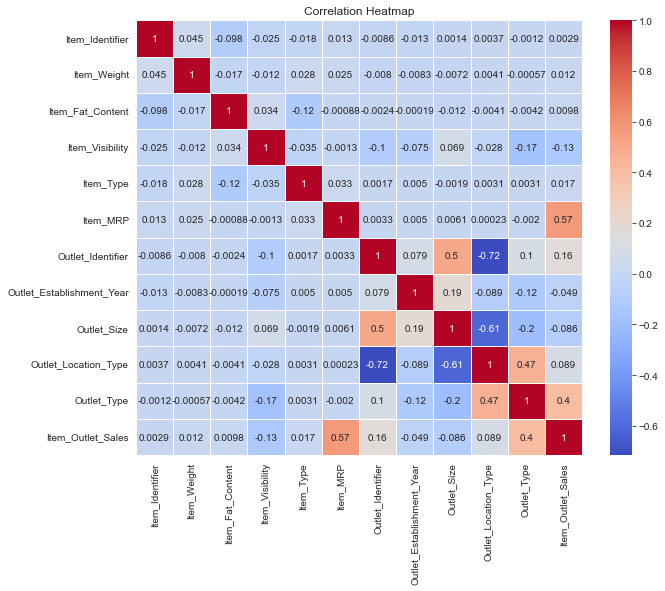

In [168]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame


# Compute the correlation matrix
correlation_matrix = label_encoded_df.corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [169]:
label_encoded_df.drop('Item_Identifier', axis=1,inplace=True)  # Replace 'target_variable' with the actual name of the target column
label_encoded_df.drop('Item_Fat_Content', axis=1,inplace=True)  # Replace 'target_variable' with the actual name of the target column
label_encoded_df.drop('Outlet_Identifier', axis=1,inplace=True)  # Replace 'target_variable' with the actual name of the target column

In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Split the dataset into features (X) and target variable (y)
X = label_encoded_df.drop('Item_Outlet_Sales', axis=1)  # Replace 'target_variable' with the actual name of the target column
y = label_encoded_df['Item_Outlet_Sales']  # Replace 'target_variable' with the actual name of the target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=14)

# Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred_linear = linear_regression.predict(X_train)

# Evaluate Linear Regression performance on training data
mse_linear_train = mean_squared_error(y_train, y_train_pred_linear)
r2_linear_train = r2_score(y_train, y_train_pred_linear)
print("Linear Regression - Training Set")
print("Mean Squared Error:", mse_linear_train)
print("R^2 Score:", r2_linear_train)

# Make predictions on the testing data
y_test_pred_linear = linear_regression.predict(X_test)

# Evaluate Linear Regression performance on testing data
mse_linear_test = mean_squared_error(y_test, y_test_pred_linear)
r2_linear_test = r2_score(y_test, y_test_pred_linear)
print("Linear Regression - Testing Set")
print("Mean Squared Error:", mse_linear_test)
print("R^2 Score:", r2_linear_test)

# Regularized Linear Regression (Ridge)
ridge = Ridge(alpha=0.5)  # Specify the regularization parameter alpha
ridge.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred_ridge = ridge.predict(X_train)

# Evaluate Ridge performance on training data
mse_ridge_train = mean_squared_error(y_train, y_train_pred_ridge)
r2_ridge_train = r2_score(y_train, y_train_pred_ridge)
print("Ridge - Training Set")
print("Mean Squared Error:", mse_ridge_train)
print("R^2 Score:", r2_ridge_train)

# Make predictions on the testing data
y_test_pred_ridge = ridge.predict(X_test)

# Evaluate Ridge performance on testing data
mse_ridge_test = mean_squared_error(y_test, y_test_pred_ridge)
r2_ridge_test = r2_score(y_test, y_test_pred_ridge)
print("Ridge - Testing Set")
print("Mean Squared Error:", mse_ridge_test)
print("R^2 Score:", r2_ridge_test)

# Regularized Linear Regression (Lasso)
lasso = Lasso(alpha=0.5)  # Specify the regularization parameter alpha
lasso.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred_lasso = lasso.predict(X_train)

# Evaluate Lasso performance on training data
mse_lasso_train = mean_squared_error(y_train, y_train_pred_lasso)
r2_lasso_train = r2_score(y_train, y_train_pred_lasso)
print("Lasso - Training Set")
print("Mean Squared Error:", mse_lasso_train)
print("R^2 Score:", r2_lasso_train)

# Make predictions on the testing data
y_test_pred_lasso = lasso.predict(X_test)

# Evaluate Lasso performance on testing data
mse_lasso_test = mean_squared_error(y_test, y_test_pred_lasso)
r2_lasso_test = r2_score(y_test, y_test_pred_lasso)
print("Lasso - Testing Set")
print("Mean Squared Error:", mse_lasso_test)
print("R^2 Score:", r2_lasso_test)

# RandomForest
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred_rf = random_forest.predict(X_train)

# Evaluate RandomForest performance on training data
mse_rf_train = mean_squared_error(y_train, y_train_pred_rf)
r2_rf_train = r2_score(y_train, y_train_pred_rf)
print("RandomForest - Training Set")
print("Mean Squared Error:", mse_rf_train)
print("R^2 Score:", r2_rf_train)

# Make predictions on the testing data
y_test_pred_rf = random_forest.predict(X_test)

# Evaluate RandomForest performance on testing data
mse_rf_test = mean_squared_error(y_test, y_test_pred_rf)
r2_rf_test = r2_score(y_test, y_test_pred_rf)
print("RandomForest - Testing Set")
print("Mean Squared Error:", mse_rf_test)
print("R^2 Score:", r2_rf_test)

# XGBoost
xgboost = XGBRegressor()
xgboost.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred_xgb = xgboost.predict(X_train)

# Evaluate XGBoost performance on training data
mse_xgb_train = mean_squared_error(y_train, y_train_pred_xgb)
r2_xgb_train = r2_score(y_train, y_train_pred_xgb)
print("XGBoost - Training Set")
print("Mean Squared Error:", mse_xgb_train)
print("R^2 Score:", r2_xgb_train)

# Make predictions on the testing data
y_test_pred_xgb = xgboost.predict(X_test)

# Evaluate XGBoost performance on testing data
mse_xgb_test = mean_squared_error(y_test, y_test_pred_xgb)
r2_xgb_test = r2_score(y_test, y_test_pred_xgb)
print("XGBoost - Testing Set")
print("Mean Squared Error:", mse_xgb_test)
print("R^2 Score:", r2_xgb_test)


Linear Regression - Training Set
Mean Squared Error: 0.008488895149403023
R^2 Score: 0.5088871226025556
Linear Regression - Testing Set
Mean Squared Error: 0.008261111450745868
R^2 Score: 0.5049487295375349
Ridge - Training Set
Mean Squared Error: 0.00848893612177637
R^2 Score: 0.5088847522045458
Ridge - Testing Set
Mean Squared Error: 0.008261318493383496
R^2 Score: 0.504936322403046
Lasso - Training Set
Mean Squared Error: 0.01728501845520371
R^2 Score: 0.0
Lasso - Testing Set
Mean Squared Error: 0.016689243521814574
R^2 Score: -0.00011133584038724997
RandomForest - Training Set
Mean Squared Error: 0.0010617431460771423
R^2 Score: 0.9385743701212248
RandomForest - Testing Set
Mean Squared Error: 0.007527293439254257
R^2 Score: 0.5489231440025961
XGBoost - Training Set
Mean Squared Error: 0.002297413004354181
R^2 Score: 0.8670864592763835
XGBoost - Testing Set
Mean Squared Error: 0.007925568860537371
R^2 Score: 0.5250562884982586


In [171]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Split the dataset into features (X) and target variable (y)
X = label_encoded_df.drop('Item_Outlet_Sales', axis=1)  # Replace 'target_variable' with the actual name of the target column
y = label_encoded_df['Item_Outlet_Sales']  # Replace 'target_variable' with the actual name of the target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestRegressor()

# Define the parameter grid for the random search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform the random search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=3, random_state=42)
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Make predictions on the testing data using the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5}
Best Score: 0.5930580183375578
Mean Squared Error: 0.006121795015281137
R^2 Score: 0.6162046645069645
